**Bishal Kundu | Unified Mentor | Data Analyst Intern**

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing Data set
hd=pd.read_csv('/content/Heart Disease data.csv')
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Null Value count

hd.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#Column names

# Attribute Information:

# age
# sex
# chest pain type (4 values)
# resting blood pressure
# serum cholestoral in mg/dl
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
# maximum heart rate achieved
# exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# the slope of the peak exercise ST segment
# number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# target= affected people 0=no,1=yes


hd.columns.to_list()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
#Renaming column values

# Confirnmed Heart disease column
hd.loc[hd['target']==1,'target']='Heart Disease'
hd.loc[hd['target']==0,'target']='No Heart Disease'

# Gender
hd.loc[hd['sex']==1,'sex']='Male'
hd.loc[hd['sex']==0,'sex']='Female'

#Type of chest Pain
hd.loc[hd['cp']==0,'cp']='Type 0'
hd.loc[hd['cp']==1,'cp']='Type 1'
hd.loc[hd['cp']==2,'cp']='Type 2'
hd.loc[hd['cp']==3,'cp']='Type 3'

#Fasting blood sugar
hd.loc[hd['fbs']==0,'fbs']='<125mg/dl'
hd.loc[hd['fbs']==1,'fbs']='>125mg/dl'

In [ ]:
# data head

hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Type 0,125,212,<125mg/dl,1,168,0,1.0,2,2,3,No Heart Disease
1,53,Male,Type 0,140,203,>125mg/dl,0,155,1,3.1,0,0,3,No Heart Disease
2,70,Male,Type 0,145,174,<125mg/dl,1,125,1,2.6,0,0,3,No Heart Disease
3,61,Male,Type 0,148,203,<125mg/dl,1,161,0,0.0,2,1,3,No Heart Disease
4,62,Female,Type 0,138,294,>125mg/dl,1,106,0,1.9,1,3,2,No Heart Disease


In [ ]:
# Statistical info of the data

hd[['age','trestbps','chol','thalach']].describe()

,age,trestbps,chol,thalach
count,1025.000000,1025.000000,1025.00000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146
std,9.072290,17.516718,51.59251,23.005724
min,29.000000,94.000000,126.00000,71.000000
25%,48.000000,120.000000,211.00000,132.000000
50%,56.000000,130.000000,240.00000,152.000000
75%,61.000000,140.000000,275.00000,166.000000
max,77.000000,200.000000,564.00000,202.000000


In [ ]:
#Coreation between the variables

hd[['age','trestbps','chol','thalach']].corr()

,age,trestbps,chol,thalach
age,1.000000,0.271121,0.219823,-0.390227
trestbps,0.271121,1.000000,0.127977,-0.039264
chol,0.219823,0.127977,1.000000,-0.021772
thalach,-0.390227,-0.039264,-0.021772,1.000000


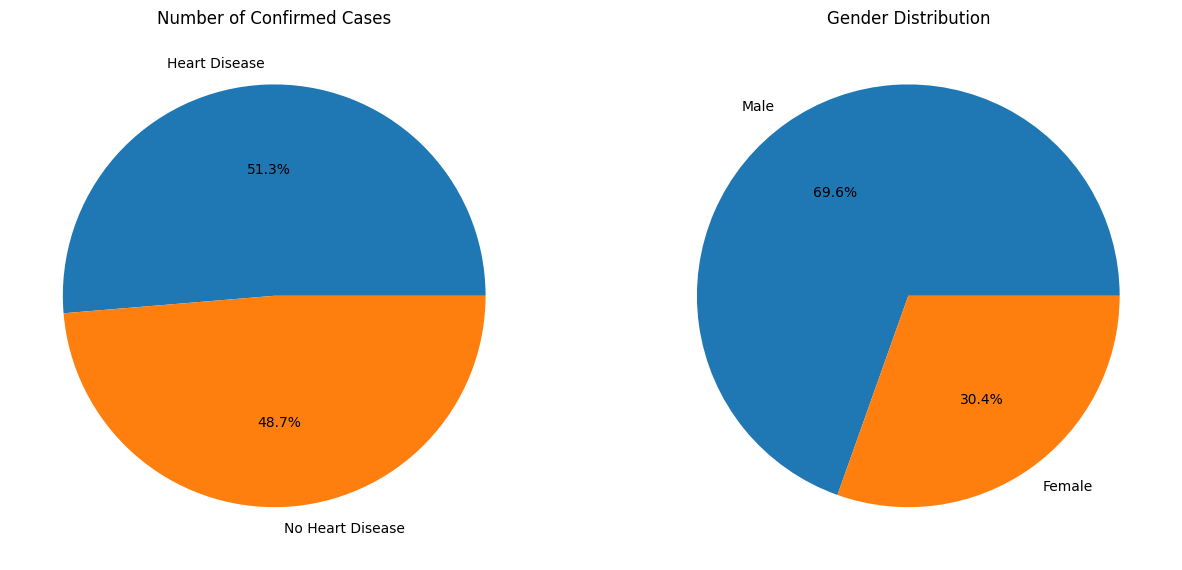

In [ ]:
# Calculate the counts for each sex and confirmed patients
target_count=hd['target'].value_counts()
sex_counts = hd['sex'].value_counts()

# creating plot area
plt.figure(figsize=(15,10))

#Deviding plot area and ploting confirmned cases
plt.subplot(1,2,1)
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Number of Confirmed Cases')

#Deviding plot area and showing Gender Distribution
plt.subplot(1,2,2)
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

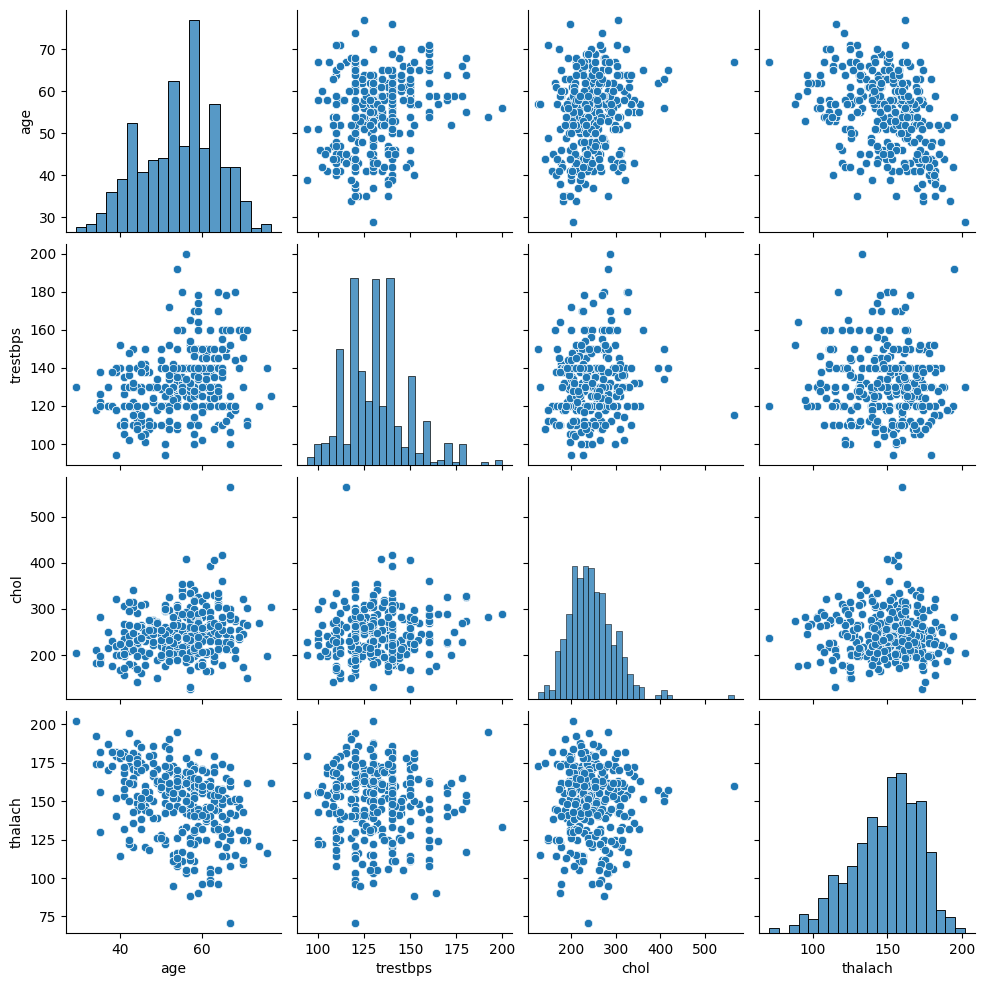

In [ ]:
#pair plot chart showing correlation and histogram (data distribution shape)

sns.pairplot(hd[['age','trestbps','chol','thalach']])

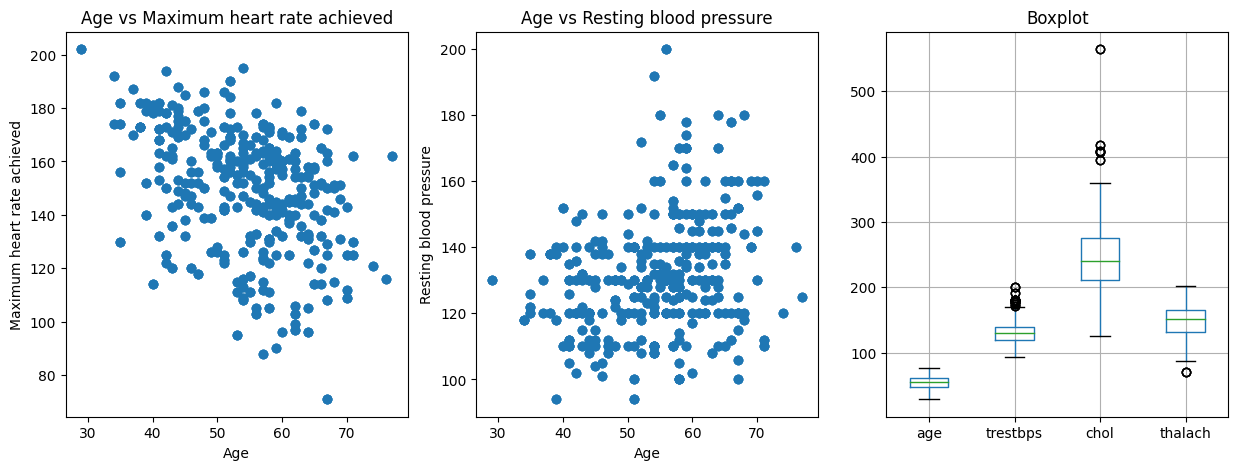

In [94]:
#Creating plot area

plt.figure(figsize=(15,5))

#deviding plot area and Maximum heart rate achieved
plt.subplot(1,3,1)
plt.scatter(hd['age'],hd['thalach'])
plt.xlabel('Age')
plt.ylabel('Maximum heart rate achieved')
plt.title('Age vs Maximum heart rate achieved')

#Deviding plot area and Resting blood pressure

plt.subplot(1,3,2)
plt.scatter(hd['age'],hd['trestbps'])
plt.xlabel('Age')
plt.ylabel('Resting blood pressure')
plt.title('Age vs Resting blood pressure')

# Boxplot to see outliers
plt.subplot(1,3,3)
hd[['age','trestbps','chol','thalach']].boxplot()
plt.title('Boxplot')
plt.show()


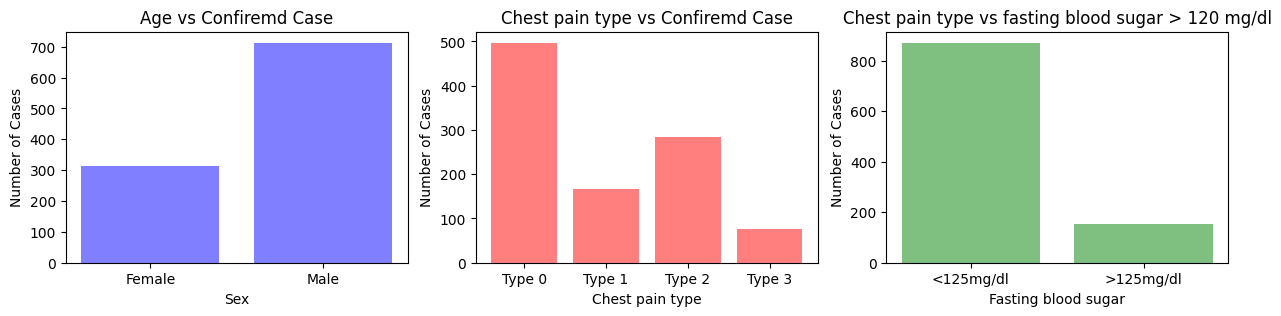

In [98]:
#Creating chart area

plt.figure(figsize=(15,3))

# Deviving the chart area Age vs Confiremd Case
plt.subplot(1,3,1)
b=hd.groupby('sex')['target'].count()
plt.bar(b.index,b.values,color='b',alpha=.5)
plt.xlabel('Sex')
plt.ylabel('Number of Cases')
plt.title('Age vs Confiremd Case')

# Deviving the chart area Chest pain type vs Confiremd Case
c=hd.groupby('cp')['target'].count()
plt.subplot(1,3,2)
plt.bar(c.index,c.values,color='r',alpha=.5)
plt.xlabel('Chest pain type')
plt.ylabel('Number of Cases')
plt.title('Chest pain type vs Confiremd Case')

# Deviving the chart area Chest pain type vs fasting blood sugar > 120 mg/dl
d=hd.groupby('fbs')['target'].count()
plt.subplot(1,3,3)
plt.bar(d.index,d.values,color='g',alpha=.5)
plt.xlabel('Fasting blood sugar')
plt.ylabel('Number of Cases')
plt.title('Chest pain type vs fasting blood sugar > 120 mg/dl')
plt.show()

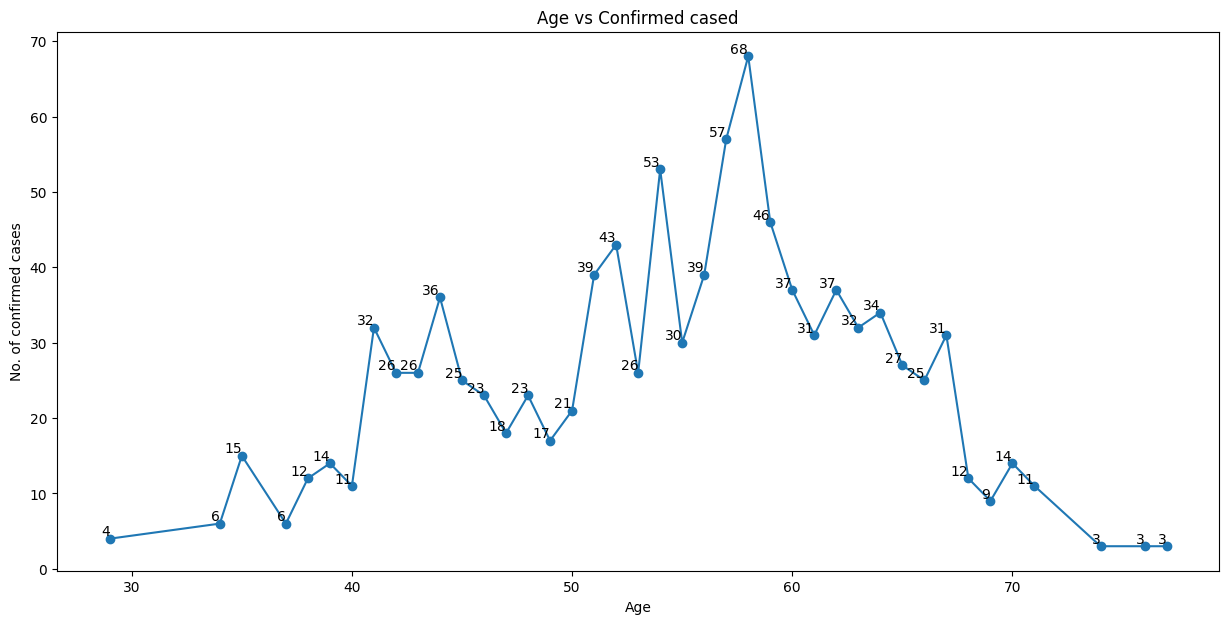

In [99]:
#creating a line chart to see age-wise confirmed cases

a = hd.groupby('age')['target'].count()
plt.figure(figsize=(15,7))
plt.plot(a, marker='o')
plt.xlabel('Age')
plt.ylabel('No. of confirmed cases')
plt.title('Age vs Confirmed cased')

# Adding labels to the data points
for x, y in zip(a.index, a.values):
    plt.text(x, y, str(y), ha='right', va='bottom')  # Adjust 'ha' and 'va' for label positioning

plt.show()

**Thank You**